In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import env 
import wrangle as w

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Acquare Zillow data from SQL

In [2]:
#my code found from wrangle.py
#def get_zillow_data():
#     # Define the filename
#     filename = 'zillow_df.csv'
    
#     # Check if the file exists
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:

# # SQL query

#         sql_query = """
#         SELECT prop.*, 
#                pred.logerror, 
#                pred.transactiondate, 
#                ac.airconditioningdesc, 
#                as.architecturalstyledesc, 
#                bc.buildingclassdesc, 
#                ht.heatingorsystemdesc, 
#                pl.propertylandusedesc, 
#                sd.storydesc, 
#                tc.typeconstructiondesc 
        
#         FROM   properties_2017 prop  
#                INNER JOIN (SELECT parcelid,
#                                   logerror,
#                                   Max(transactiondate) transactiondate 
#                            FROM   predictions_2017 
#                            GROUP  BY parcelid, logerror) pred
#                        USING (parcelid) 
#                LEFT JOIN airconditioningtype ac USING (airconditioningtypeid) 
#                LEFT JOIN architecturalstyletype as USING (architecturalstyletypeid) 
#                LEFT JOIN buildingclasstype bc USING (buildingclasstypeid) 
#                LEFT JOIN heatingorsystemtype ht USING (heatingorsystemtypeid) 
#                LEFT JOIN propertylandusetype pl USING (propertylandusetypeid) 
#                LEFT JOIN storytype st USING (storytypeid) 
#                LEFT JOIN typeconstructiontype tc USING (typeconstructiontypeid) 
# #         WHERE  prop.latitude IS NOT NULL 
# #                AND prop.longitude IS NOT NULL AND pred.transactiondate like "2017%%' 
# #                 """
# #     return df
# # SQL query

# #Insturctor John G code
# sql = """
# SELECT prop.*, 
#        pred.logerror, 
#        pred.transactiondate, 
#        air.airconditioningdesc, 
#        arch.architecturalstyledesc, 
#        build.buildingclassdesc, 
#        heat.heatingorsystemdesc, 
#        landuse.propertylandusedesc, 
#        story.storydesc, 
#        construct.typeconstructiondesc 

# FROM   properties_2017 prop  
#        INNER JOIN (SELECT parcelid,
#        					  logerror,
#                           Max(transactiondate) transactiondate 
#                    FROM   predictions_2017 
#                    GROUP  BY parcelid, logerror) pred
#                USING (parcelid) 
#        LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
#        LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
#        LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
#        LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
#        LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
#        LEFT JOIN storytype story USING (storytypeid) 
#        LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
# WHERE  prop.latitude IS NOT NULL 
#        AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31' 
# """

In [3]:
# # acquire zillow data using the query
# def get_zillow(sql):
#     url = get_db_url('zillow')
#     zillow_df = pd.read_sql(sql_query, url)
#     return zillow_df


In [4]:
# df = get_zillow(sql)
# df.to_csv("zillow.csv")
# df = pd.read_csv("zillow.csv")

### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)¶


In [5]:
df = w.get_zillow_data()

In [6]:
df.head()

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   
3  2288172  12177905                    NaN                       NaN   
4  1970746  10887214                    1.0                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          3.5         4.0                  NaN   
1           NaN          1.0         2.0                  NaN   
2           NaN          2.0         3.0                  NaN   
3           NaN          3.0         4.0                  NaN   
4           NaN          3.0         3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1                    NaN                1.0  ...         6.111001e+13   
2                    NaN                2.0  ...         6.059022e+13   
3                    8.0                3.0  ...         6.037300e+13   
4                    8.0                3.0  ...         6.037124e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       2017-01-01                  NaN                     NaN   
1  0.055619       2017-01-01                  NaN                     NaN   
2  0.005383       2017-01-01                  NaN                     NaN   
3 -0.103410       2017-01-01                  NaN                     NaN   
4  0.006940       2017-01-01              Central                     NaN   

   buildingclassdesc  heatingorsystemdesc        propertylandusedesc  \
0                NaN                  NaN  Single Family Residential   
1                NaN                  NaN  Single Family Residential   
2                NaN                  NaN  Single Family Residential   
3                NaN              Central  Single Family Residential   
4                NaN              Central                Condominium   

   storydesc  typeconstructiondesc  
0        NaN                   NaN  
1        NaN                   NaN  
2        NaN                   NaN  
3        NaN                   NaN  
4        NaN                   NaN  

[5 rows x 68 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [8]:
# find nulls

df.isnull().sum().sort_values(ascending = False)[:45]

buildingclassdesc           77365
buildingclasstypeid         77365
finishedsquarefeet13        77339
storytypeid                 77330
basementsqft                77330
storydesc                   77330
yardbuildingsqft26          77310
fireplaceflag               77208
architecturalstyletypeid    77174
architecturalstyledesc      77174
typeconstructiondesc        77158
typeconstructiontypeid      77158
finishedsquarefeet6         76994
pooltypeid10                76916
decktypeid                  76766
poolsizesum                 76513
pooltypeid2                 76306
hashottuborspa              75842
yardbuildingsqft17          74992
taxdelinquencyyear          74494
taxdelinquencyflag          74494
finishedsquarefeet15        74371
finishedsquarefeet50        71357
finishedfloor1squarefeet    71357
fireplacecnt                69104
threequarterbathnbr         67284
pooltypeid7                 62338
poolcnt                     61243
numberofstories             59820
airconditionin

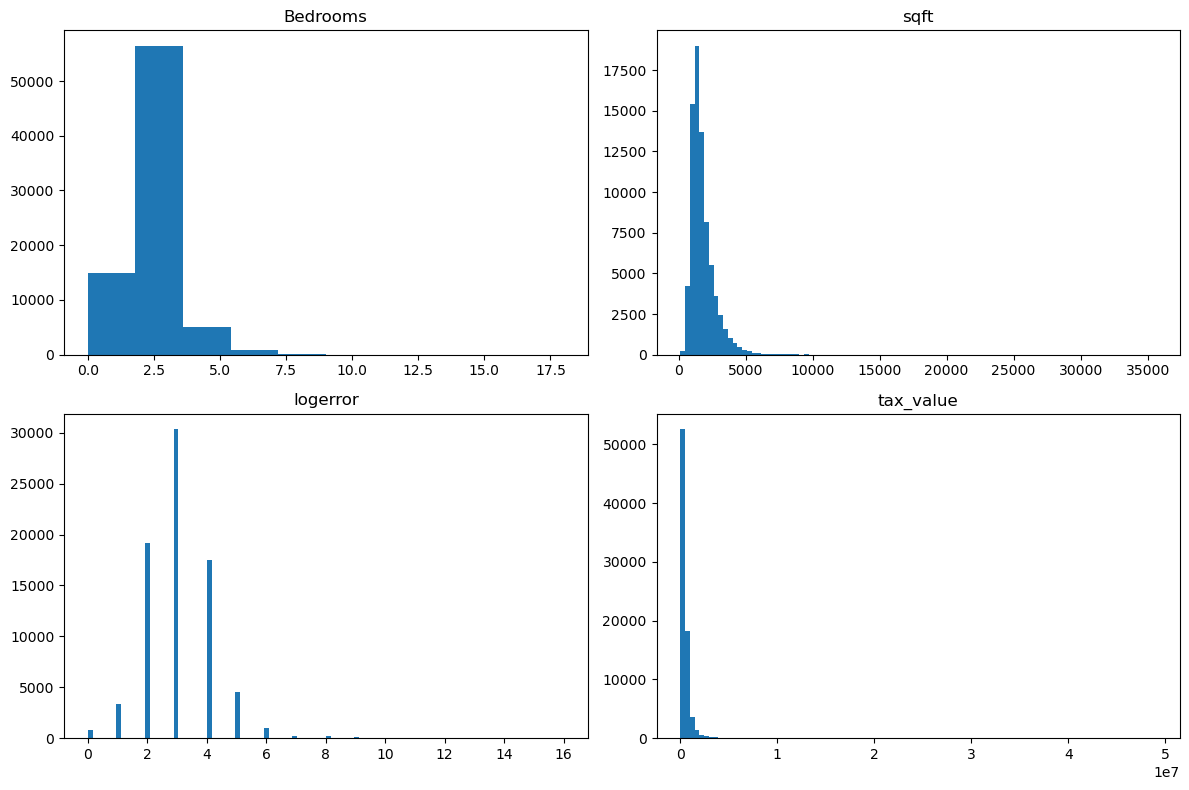

In [9]:
# plot some features from regression

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bathroomcnt, bins = 10)
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins = 100)
plt.title('sqft')



plt.subplot(223)
plt.hist(df.bedroomcnt, bins = 100)
plt.title('logerror')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt, bins = 100)
plt.title('tax_value')

plt.tight_layout();

#### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52427
architecturalstyletypeid    77174
basementsqft                77330
                            ...  
buildingclassdesc           77365
heatingorsystemdesc         27941
propertylandusedesc             0
storydesc                   77330
typeconstructiondesc        77158
Length: 68, dtype: int64

In [11]:
def find_nulls(df):
    null_found = df.isnull().sum()
    rows = df.shape[0]
    pct_null = null_found / rows
    missing_nulls = pd.DataFrame({'number_missing_rows': null_found, 'percent_rows_missing': pct_null})
    return missing_nulls

In [12]:
col_nulls = find_nulls(df)
col_nulls.sort_values(by="percent_rows_missing", ascending=False).head(40)

number_missing_rows  percent_rows_missing
buildingclassdesc                       77365              0.999806
buildingclasstypeid                     77365              0.999806
finishedsquarefeet13                    77339              0.999470
storytypeid                             77330              0.999354
basementsqft                            77330              0.999354
storydesc                               77330              0.999354
yardbuildingsqft26                      77310              0.999095
fireplaceflag                           77208              0.997777
architecturalstyletypeid                77174              0.997338
architecturalstyledesc                  77174              0.997338
typeconstructiondesc                    77158              0.997131
typeconstructiontypeid                  77158              0.997131
finishedsquarefeet6                     76994              0.995012
pooltypeid10                            76916              0.994004
decktypeid                              76766              0.992065
poolsizesum                             76513              0.988796
pooltypeid2                             76306              0.986120
hashottuborspa                          75842              0.980124
yardbuildingsqft17                      74992              0.969139
taxdelinquencyyear                      74494              0.962704
taxdelinquencyflag                      74494              0.962704
finishedsquarefeet15                    74371              0.961114
finishedsquarefeet50                    71357              0.922163
finishedfloor1squarefeet                71357              0.922163
fireplacecnt                            69104              0.893047
threequarterbathnbr                     67284              0.869527
pooltypeid7                             62338              0.805609
poolcnt                                 61243              0.791458
numberofstories                         59820              0.773068
airconditioningdesc                     52427              0.677526
airconditioningtypeid                   52427              0.677526
garagecarcnt                            51906              0.670793
garagetotalsqft                         51906              0.670793
regionidneighborhood                    46490              0.600801
heatingorsystemtypeid                   27941              0.361088
heatingorsystemdesc                     27941              0.361088
buildingqualitytypeid                   27709              0.358090
propertyzoningdesc                      27050              0.349574
unitcnt                                 26818              0.346575
lotsizesquarefeet                        8239              0.106475

#### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [13]:
#check data shape
df.shape

(77380, 68)

In [14]:
#John G  -  look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

1.0      47292
NaN      26818
2.0       2018
4.0        723
3.0        525
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

In [15]:
# John G  - Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]


In [16]:
# check # of columns and rows left
df.shape

(71193, 68)

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [17]:
# John G 

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df
df = handle_missing_values(df)

In [18]:
# check shape to see how many columns and rows were dropped

df.shape

(71193, 34)

In [19]:
# Asscess nulls to eliminate unnecessary columns
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26467
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           24901
latitude                            0
longitude                           0
lotsizesquarefeet                8020
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26175
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26149
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentye

In [20]:
# remove unnecessary columns which wont affect data integrity

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt']

In [21]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df
df = remove_columns(df, cols_to_remove)

In [22]:
# review nulls

df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26467
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8020
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24901
dtype: int64

In [23]:
# Assess larger null counts for removal

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31278
NaN           24901
Floor/Wall    13193
Yes             846
Forced air      775
Solar           101
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

From Instructor John G 

In [24]:
df.fips.value_counts()

6037.0    45204
6059.0    20253
6111.0     5736
Name: fips, dtype: int64

In [25]:
# removing ht sys would wipe out fips 6111 (ventura cty)
df[df.fips == 6111].heatingorsystemdesc.value_counts(dropna = False)

NaN    5736
Name: heatingorsystemdesc, dtype: int64

In [26]:
# We don't want to remove an entire value from fips, so we will drop this column entirely 

df.drop(columns = 'heatingorsystemdesc', inplace = True)

In [27]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbers = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26467
8.0     13367
6.0     12637
4.0      8206
7.0      5496
9.0      2109
5.0      1495
11.0      844
10.0      301
3.0       146
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [28]:
df[df.fips == 6059].buildingqualitytypeid.value_counts(dropna = False)

NaN    20253
Name: buildingqualitytypeid, dtype: int64

In [29]:
# Check work
df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26467
8.0     13367
6.0     12637
4.0      8206
7.0      5496
9.0      2109
5.0      1495
11.0      844
10.0      301
3.0       146
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [30]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [31]:
# should I fill missing values for buildingqualitytypeid with median value?
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [32]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8020
rawcensustractandblock             0
regionidcity                    1321
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        73
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

<Axes: >

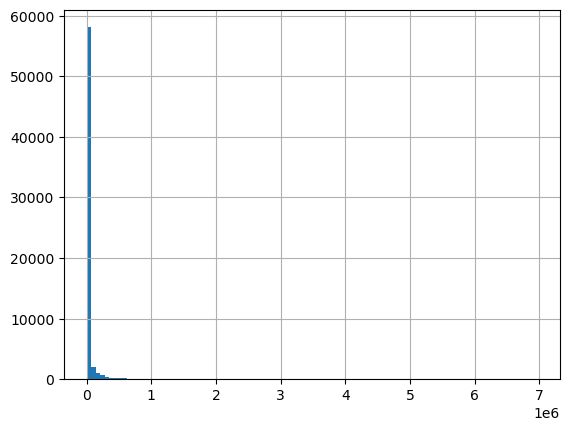

In [33]:
# look at lot-size distribution
df.lotsizesquarefeet.hist(bins = 100)

In [34]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7314.0

In [35]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [36]:
df.shape

(71193, 22)

In [85]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

## IS BUILD QUALITY SIGNFICANT?

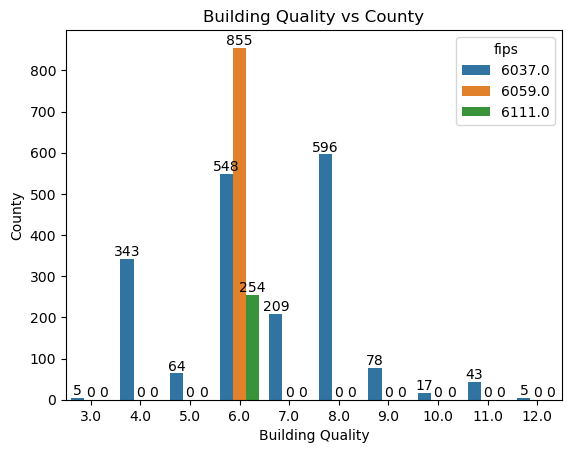

In [41]:
def build_bar(df):    
    df_sample = df.sample(n=3017)
    # Visualizing bathrooms by county
    build = sns.countplot(data=df_sample, x='buildingqualitytypeid', hue='fips')
    
    # Access the legend object

    build.set_xlabel('Building Quality')
    build.set_ylabel('County')
    plt.title('Building Quality vs County')
                          
     # Add count numbers on bars
    for p in build.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        build.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
    plt.show()
build_bar(df)

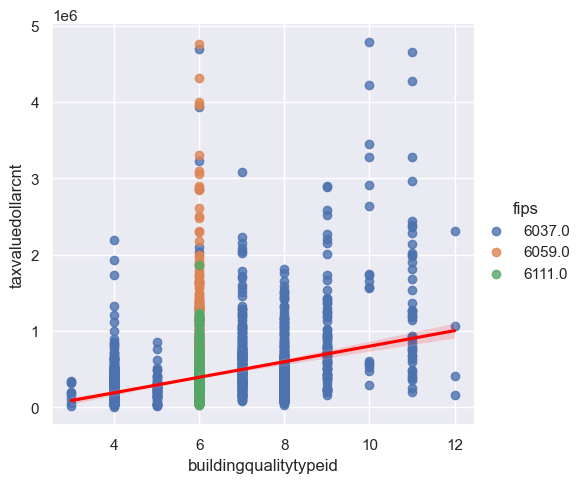

In [84]:
def plot_variable_pairs():
    df_sample = df.sample(n=3017)
    sns.lmplot(x='buildingqualitytypeid', y="taxvaluedollarcnt", data=df_sample, hue='fips', line_kws={'color': 'red'})
        
plot_variable_pairs()


In [83]:
#Building stat
from scipy.stats import pearsonr, spearmanr
def build_stat(df):
    alpha = 0.05
    df_r, df_p = pearsonr(df.buildingqualitytypeid, df.taxvaluedollarcnt)
    print('train_r:', df_r)
    print('train_p:',df_p)
    if df_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
build_stat(df)

train_r: 0.28449739868650603
train_p: 0.0
Outcome: We reject the null


In [43]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [44]:
# How many rows and columns are left?

df.shape

(69760, 22)

### Check for outliers in select columns

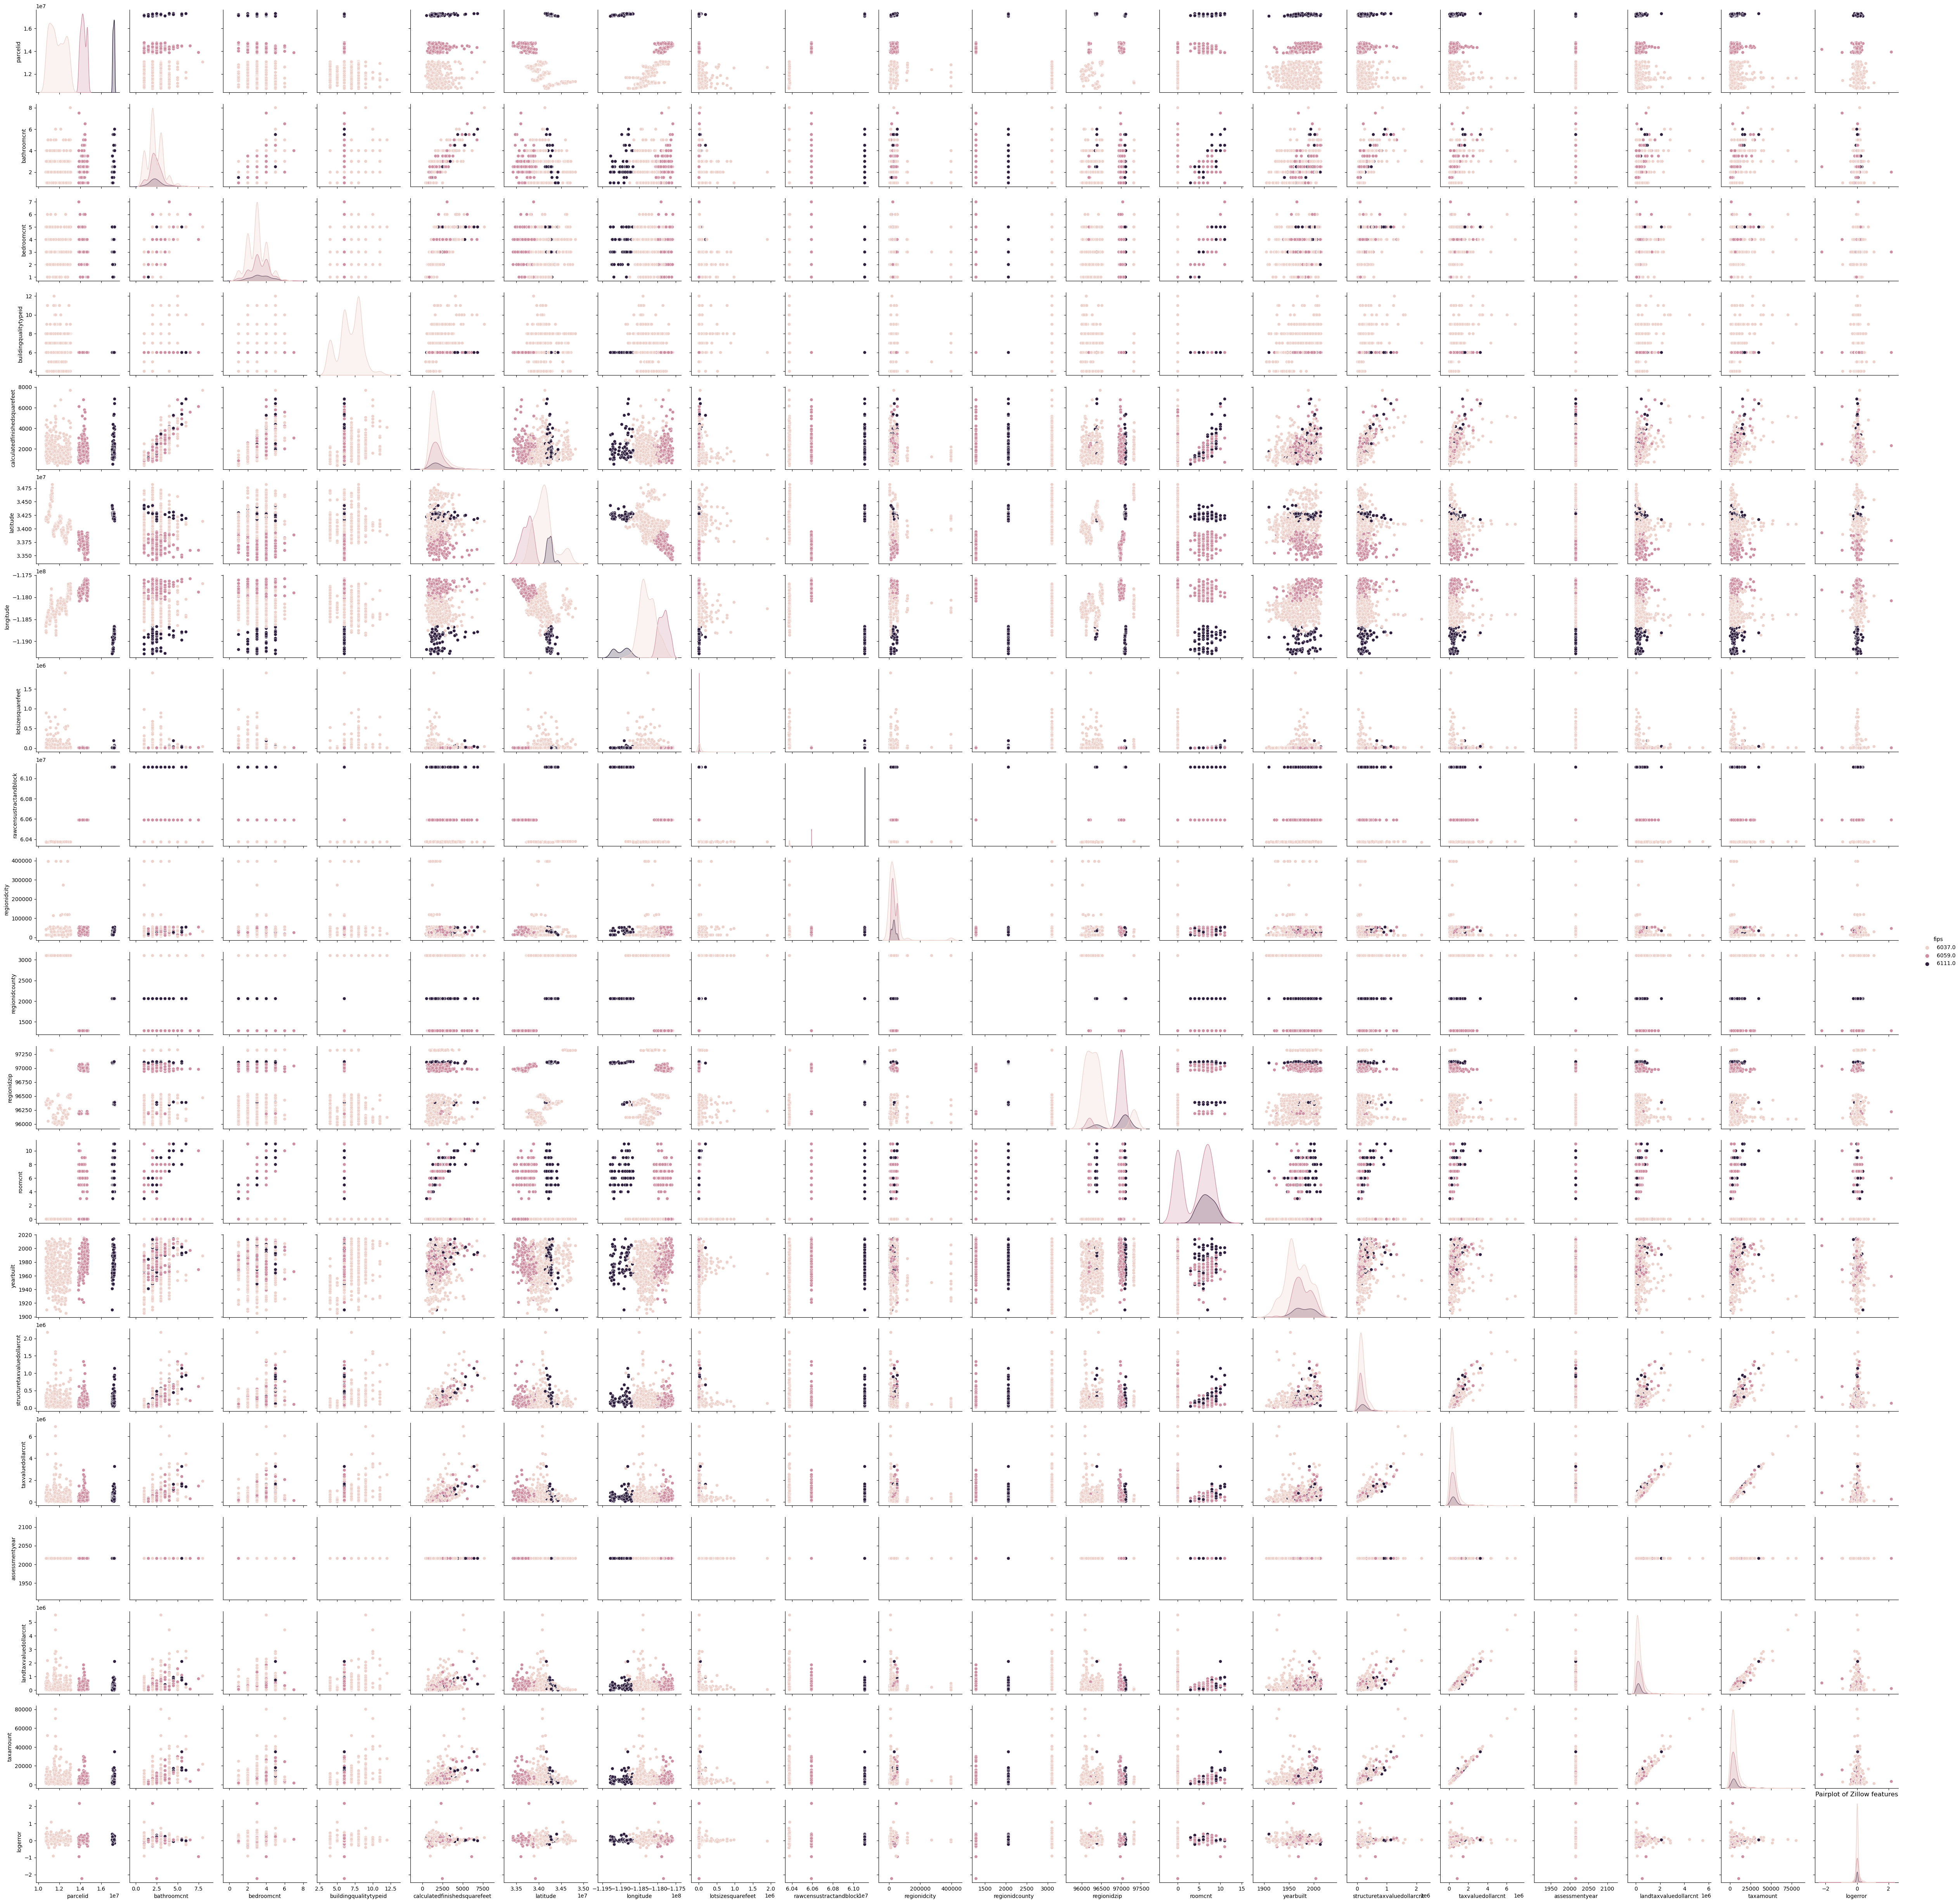

In [46]:
df_sample = df.sample(n=1000)
features = ['bedroomcnt', 'lotsizesquarefeet', 'roomcnt','logerror']
sns.pairplot(df_sample, hue = 'fips')
plt.title('Pairplot of Zillow features')
plt.show()

In [45]:
df.head()

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  14297519          3.5         4.0                    6.0   
1  17052889          1.0         2.0                    6.0   
2  14186244          2.0         3.0                    6.0   
3  12177905          3.0         4.0                    8.0   
4  10887214          3.0         3.0                    8.0   

   calculatedfinishedsquarefeet    fips    latitude    longitude  \
0                        3100.0  6059.0  33634931.0 -117869207.0   
1                        1465.0  6111.0  34449266.0 -119281531.0   
2                        1243.0  6059.0  33886168.0 -117823170.0   
3                        2376.0  6037.0  34245180.0 -118240722.0   
4                        1312.0  6037.0  34185120.0 -118414640.0   

   lotsizesquarefeet  rawcensustractandblock  ...  regionidzip  roomcnt  \
0             4506.0            6.059063e+07  ...      96978.0      0.0   
1            12647.0            6.111001e+07  ...      97099.0      5.0   
2             8432.0            6.059022e+07  ...      97078.0      6.0   
3            13038.0            6.037300e+07  ...      96330.0      0.0   
4           278581.0            6.037124e+07  ...      96451.0      0.0   

   yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
0     1998.0                    485713.0          1023282.0          2016.0   
1     1967.0                     88000.0           464000.0          2016.0   
2     1962.0                     85289.0           564778.0          2016.0   
3     1970.0                    108918.0           145143.0          2016.0   
4     1964.0                     73681.0           119407.0          2016.0   

   landtaxvaluedollarcnt  taxamount  logerror  transactiondate  
0               537569.0   11013.72  0.025595       2017-01-01  
1               376000.0    5672.48  0.055619       2017-01-01  
2               479489.0    6488.30  0.005383       2017-01-01  
3                36225.0    1777.51 -0.103410       2017-01-01  
4                45726.0    1533.89  0.006940       2017-01-01  

[5 rows x 22 columns]

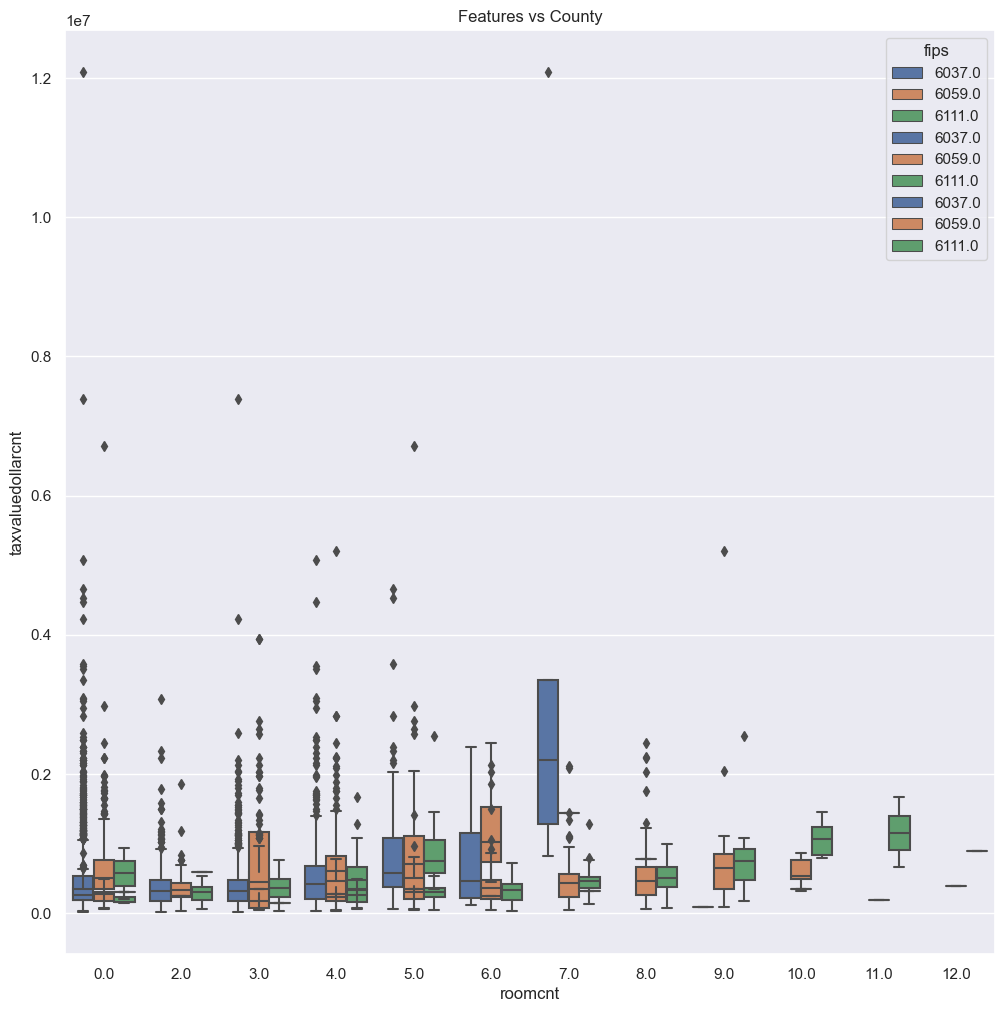

In [47]:
def zillow_in_box(df):
    df_sample = df.sample(n=3017)
    features = ['bedroomcnt', 'lotsizesquarefeet', 'roomcnt']
    
    for feature in features:
        sns.set(rc={'figure.figsize': (12, 12)})
        
        sns.boxplot(x=feature, y="taxvaluedollarcnt", data=df_sample, hue='fips')
        plt.title('Features vs County')
zillow_in_box(df)

<Axes: xlabel='buildingqualitytypeid', ylabel='taxvaluedollarcnt'>

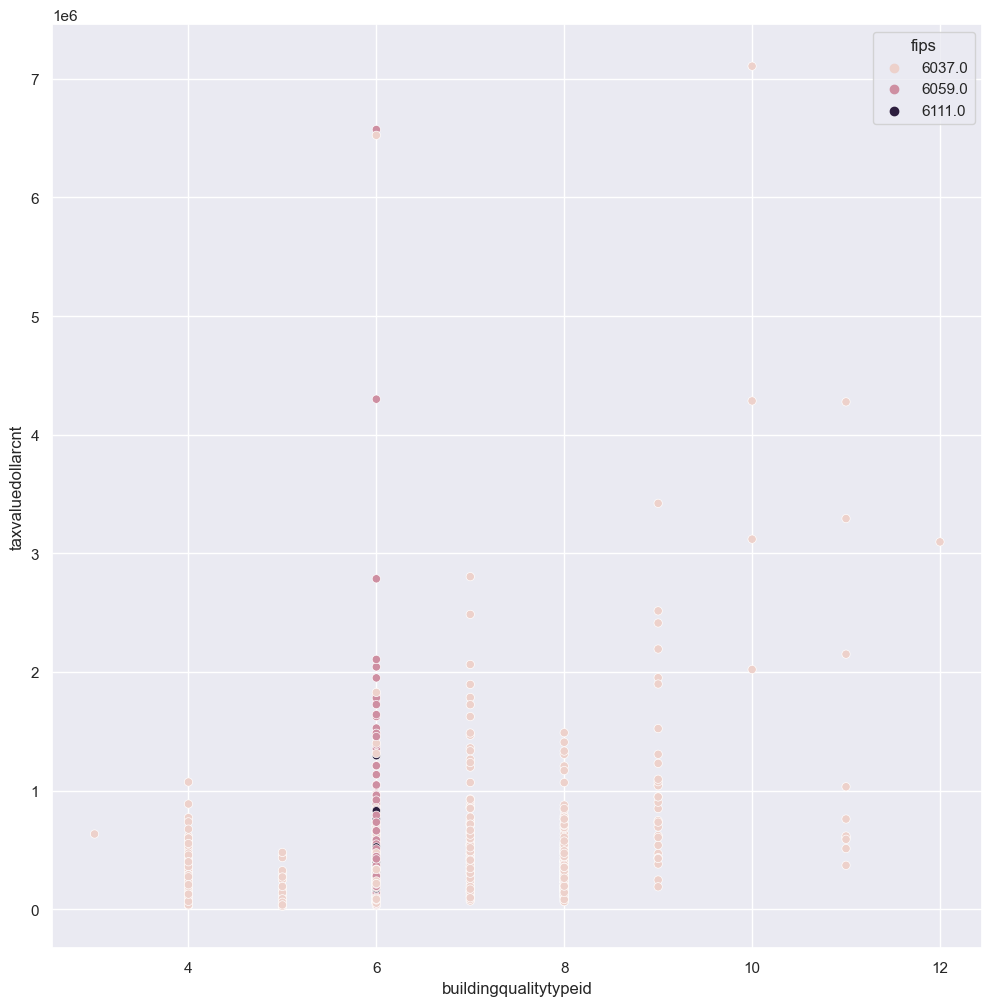

In [48]:
df_sample = df.sample(n=1000)
sns.scatterplot(x= 'buildingqualitytypeid', y="taxvaluedollarcnt", data=df_sample, hue = 'fips')



<Axes: ylabel='taxvaluedollarcnt'>

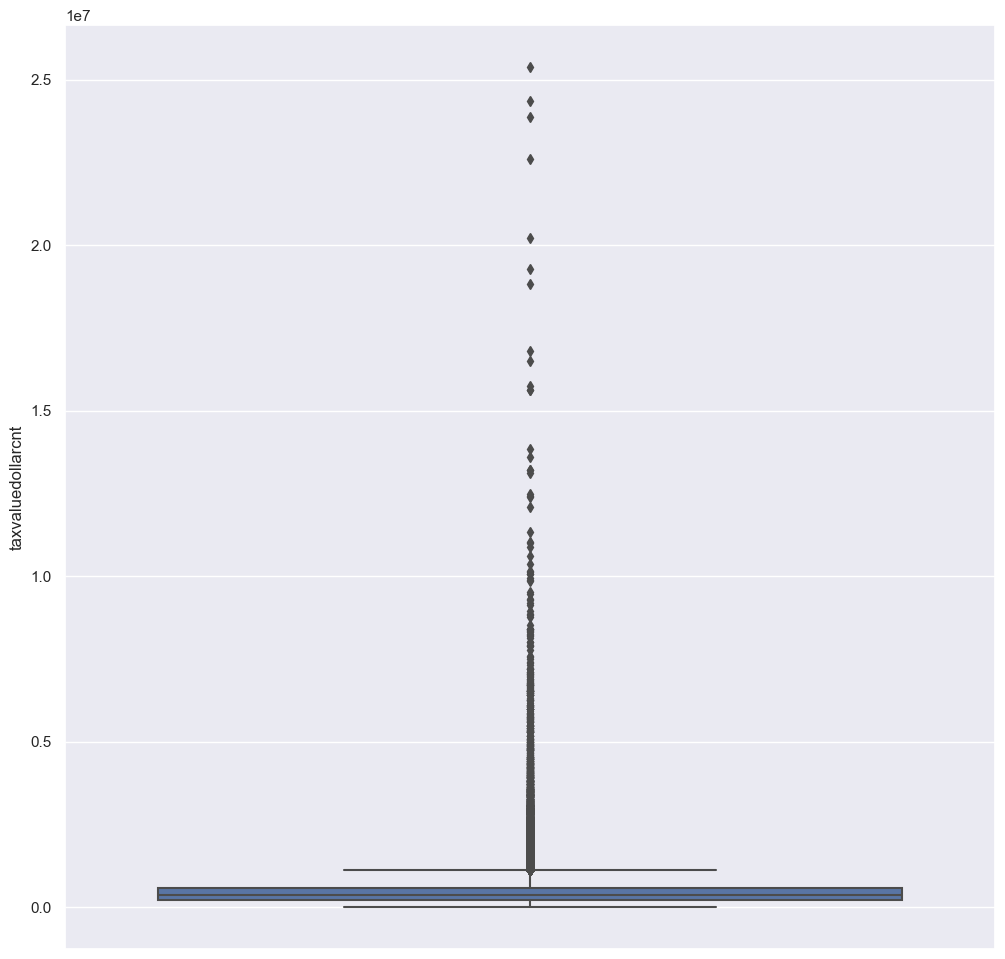

In [49]:
# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = df)

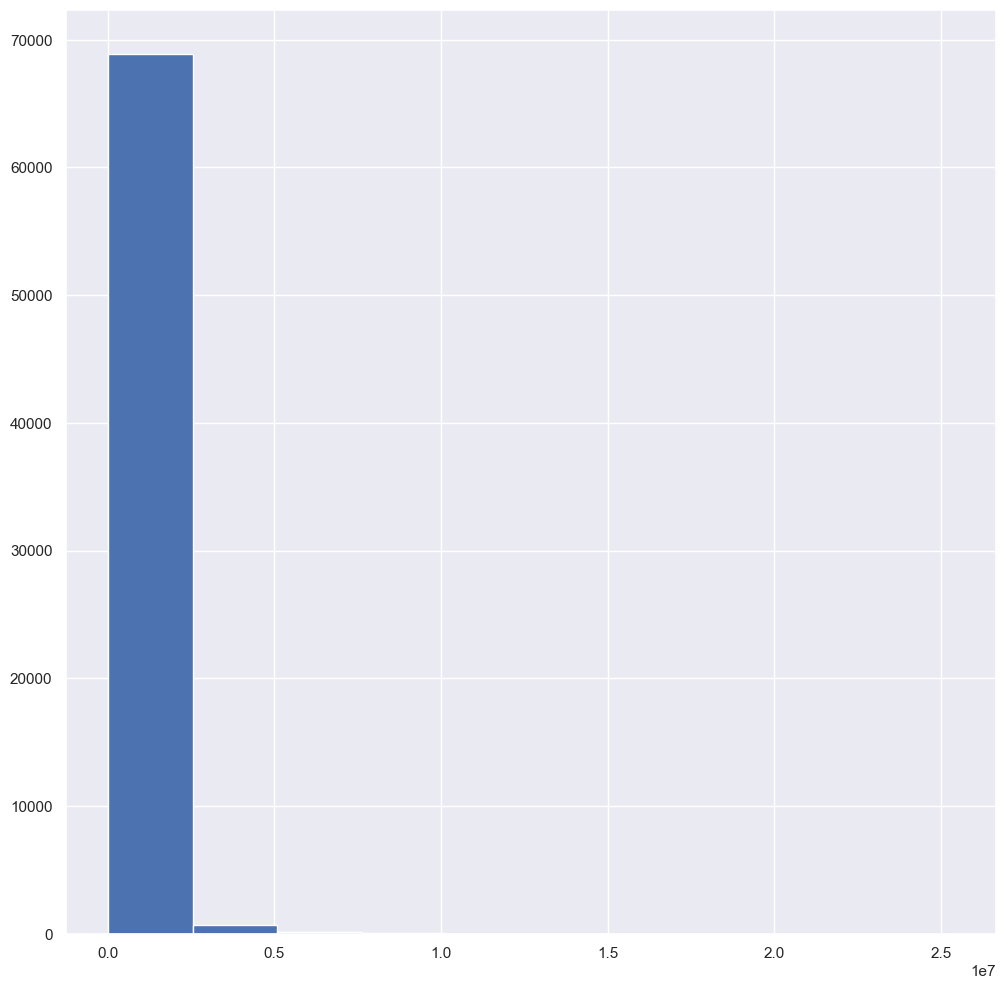

In [50]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

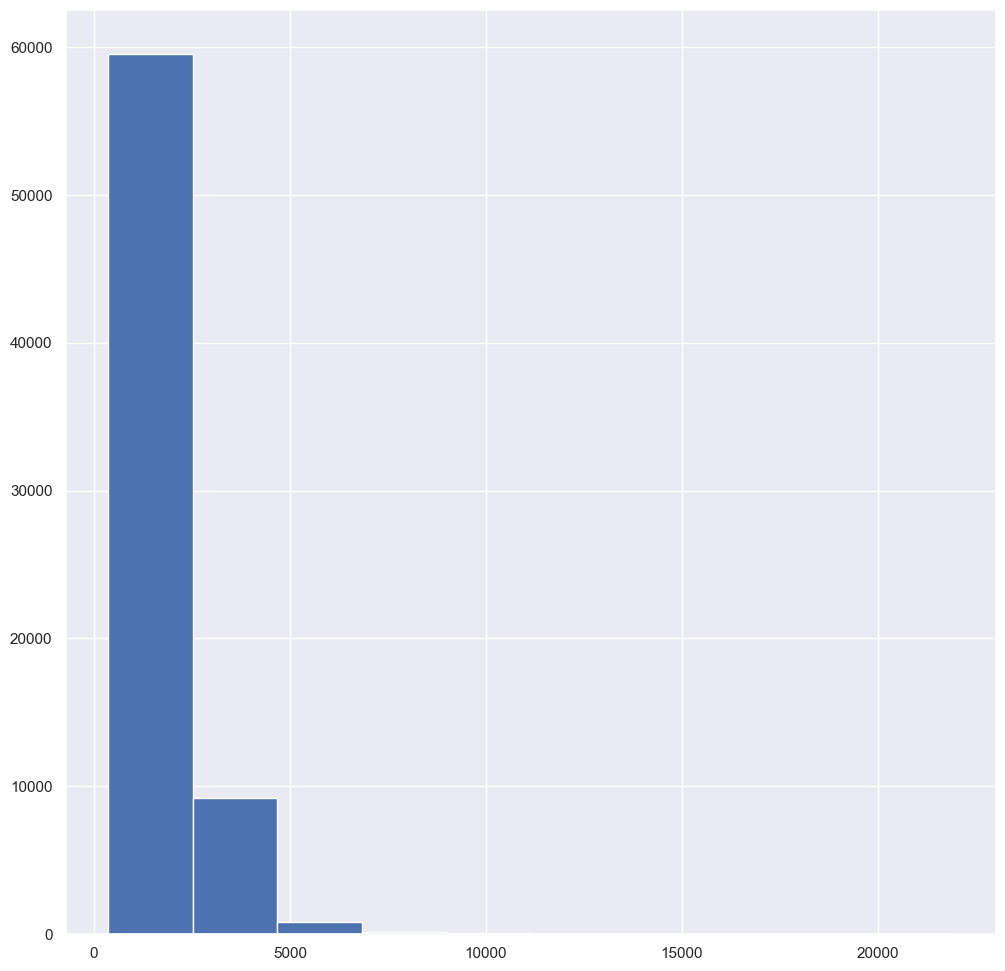

In [51]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

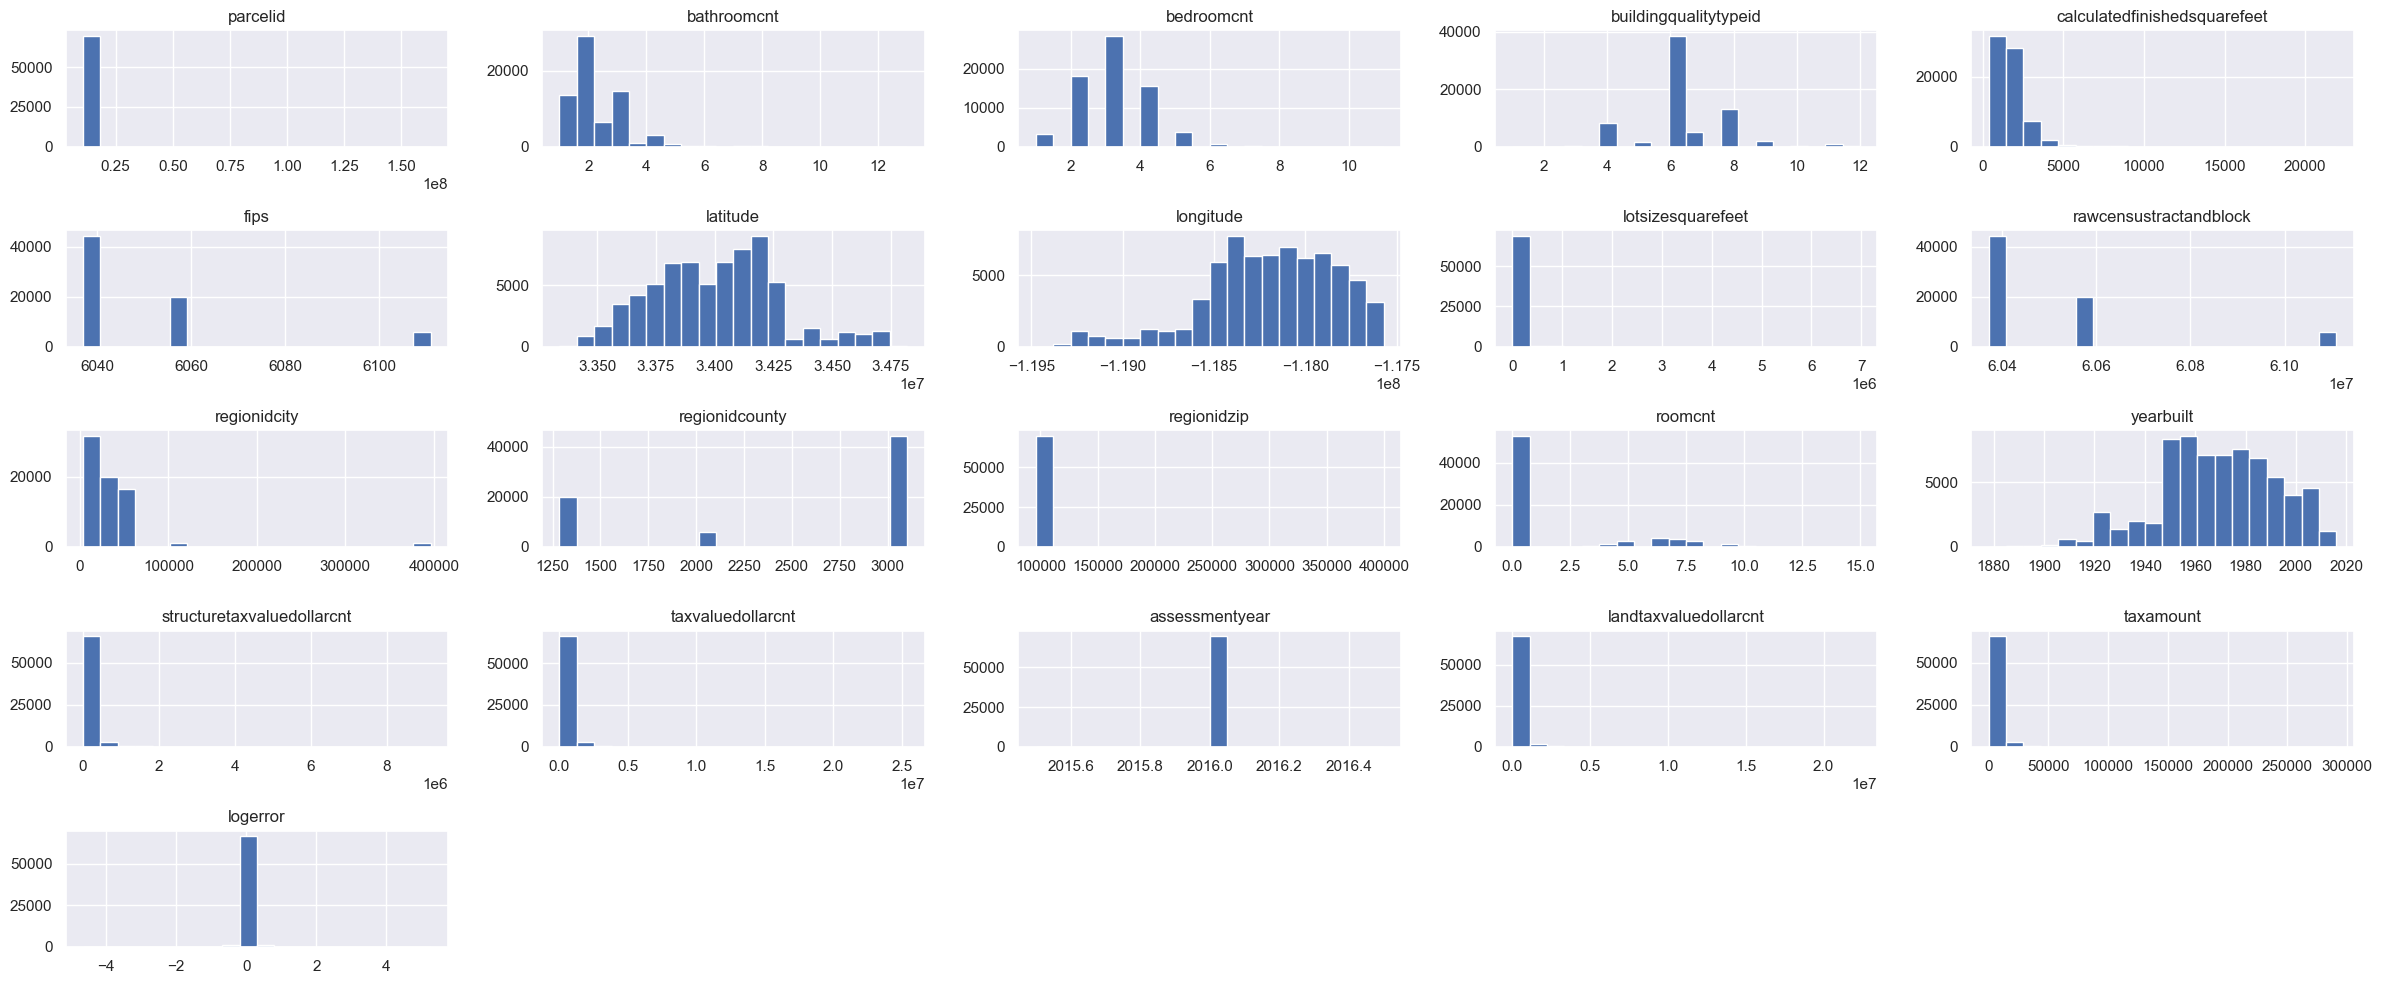

In [52]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [53]:
# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69571, 22)

In [54]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69571, 22)

In [55]:
# Function to read and wrangle data:

def wrangle_zillow():
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc','heatingorsystemdesc','unitcnt'
                            ,'buildingqualitytypeid'])


    # replace nulls in unitcnt with 1
#     df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
#     df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
#     df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 2_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df


### Mall Customers

In [56]:
sql = 'select * from customers'

In [57]:
# acquire mall customers data using the query:

def get_mall_data(sql):
    url = w.get_connection('mall_customers')
    mall = pd.read_sql(sql, url, index_col='customer_id')
    return mall

In [58]:
# acquire data

mall = get_mall_data(sql)

In [59]:
mall.head()

gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
4            Female   23             16              77
5            Female   31             17              40

In [60]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [61]:
mall.describe()

age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000

In [62]:
mall.shape

(200, 4)

In [63]:
mall.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [64]:
mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

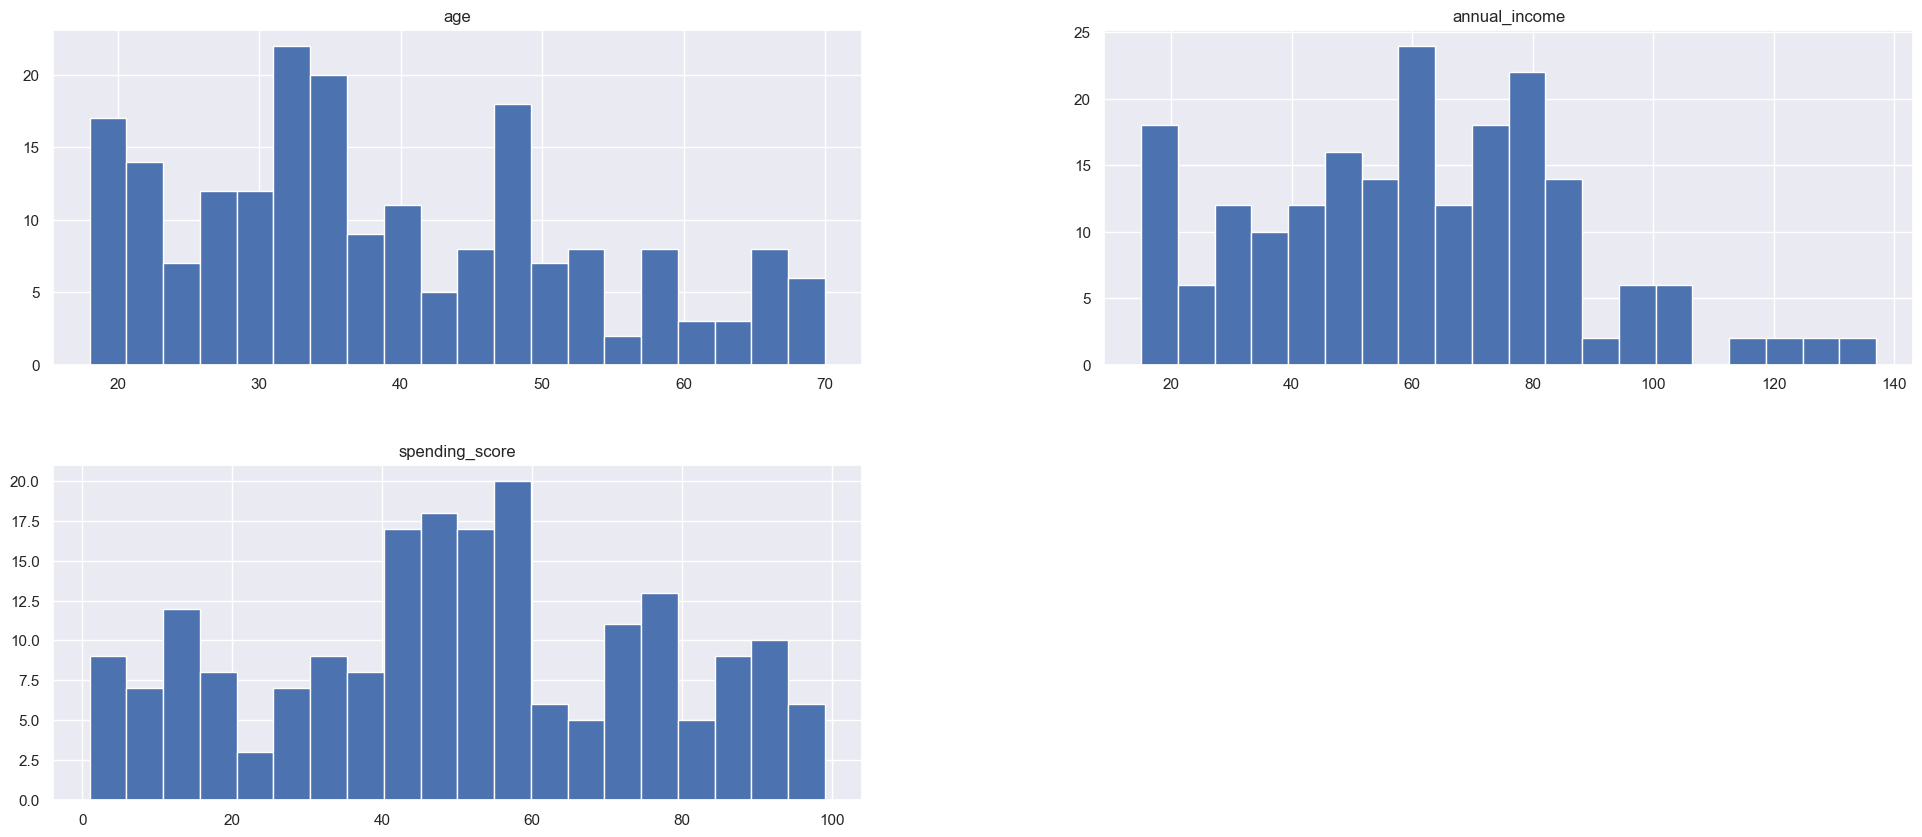

In [65]:
mall.hist(figsize=(24, 10), bins=20);

<Axes: ylabel='spending_score'>

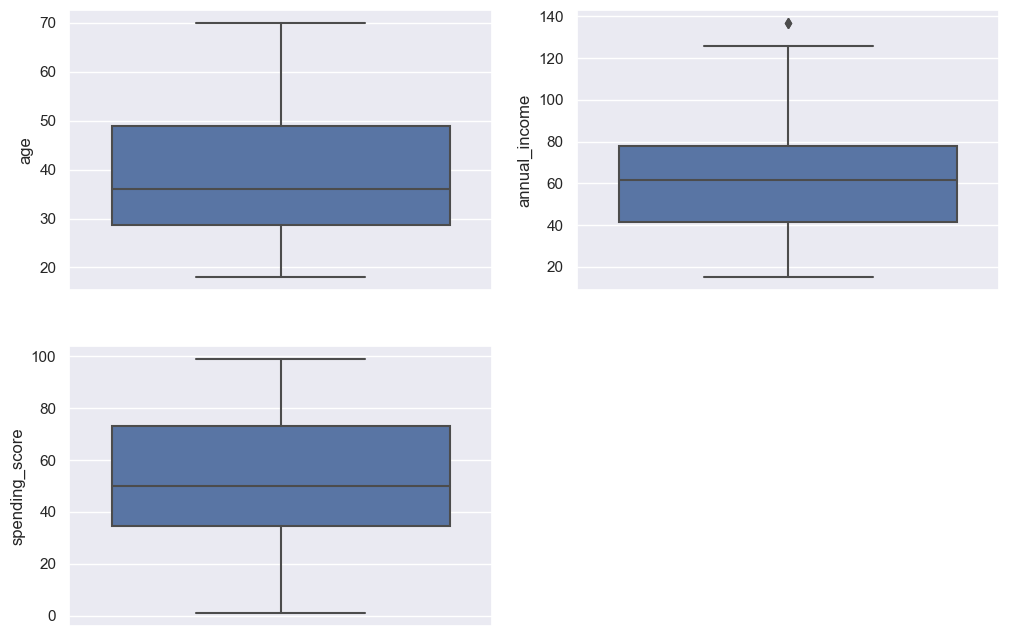

In [66]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(y = mall.age)

plt.subplot(222)
sns.boxplot(y = mall.annual_income)

plt.subplot(223)
sns.boxplot(y = mall.spending_score)

Seems like we have only few outliers based on income column

In [67]:
# Calculate q1, q3 and iqr for income

q1 = mall.annual_income.quantile(0.25)
q3 = mall.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

lower_bound_income, upper_bound_income

(-13.25, 132.75)

In [68]:
mall[mall.annual_income > upper_bound_income]

gender  age  annual_income  spending_score
customer_id                                           
199           Male   32            137              18
200           Male   30            137              83

In [69]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall.annual_income.quantile(0.25)
        q3 = mall.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [70]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
mall.shape

(198, 4)

In [71]:
mall.head()

gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
4            Female   23             16              77
5            Female   31             17              40

Encode categorical columns using a one hot encoder (pd.get_dummies).

In [72]:
# encode the gender column

dummy_df = pd.get_dummies(mall.gender, drop_first=True)
dummy_df.head()

Male
customer_id      
1               1
2               1
3               0
4               0
5               0

In [73]:
# concat the dummies df with original df. Drop the 'gender' column

mall = pd.concat([mall, dummy_df], axis=1).drop(columns = ['gender'])
mall.head()

age  annual_income  spending_score  Male
customer_id                                          
1             19             15              39     1
2             21             15              81     1
3             20             16               6     0
4             23             16              77     0
5             31             17              40     0

#### Split data (train, validate, and test split).


In [74]:
train, test = train_test_split(mall, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [75]:
# check shape
train.shape, validate.shape, test.shape

((118, 4), (40, 4), (40, 4))

#### Scaling numeric columns

In [76]:
train.head()

age  annual_income  spending_score  Male
customer_id                                          
182           32             97              86     0
49            29             40              42     0
35            49             33              14     0
186           30             99              97     1
114           19             64              46     1

In [77]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [78]:
train.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [79]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [80]:
train_scaled.head()

age  annual_income  spending_score  Male
customer_id                                               
182          0.269231       0.738739        0.867347   0.0
49           0.211538       0.225225        0.418367   0.0
35           0.596154       0.162162        0.132653   0.0
186          0.230769       0.756757        0.979592   1.0
114          0.019231       0.441441        0.459184   1.0

In [81]:
# Write a master wrangle fuction which acquires and prepares the data

def wrangle_mall():
    
    # acquire data
    sql = 'select * from customers'
    mall = get_mall_customers(sql)
    
    # handle outliers
    mall = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall.gender, drop_first=True)
    mall = pd.concat([mall, dummy_df], axis=1).drop(columns = ['gender'])
    mall.rename(columns= {'Male': 'is_male'}, inplace = True)

    # split the data in train, validate and test
    train, test = train_test_split(mall, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler, train, validate, test

In [82]:
# use the wrangle function:

scaler, train, validate, test = wrangle_mall()

NameError: name 'get_mall_customers' is not defined

In [ ]:
#scaled the values
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [ ]:
train_scaled.head()